In [1]:
using Polynomials

function LagrangeInterpolant(xvals, yvals, x)
    amount = length(x)
    amount == 1 ? output = 0 : output = zeros(amount)
    for k = 1:amount
        N = length(xvals)
        LagrangePolynomials = ones(N)
        for i in 1:N
            for j in [1:i - 1 ; i + 1:N]
                LagrangePolynomials[i] = LagrangePolynomials[i] .* (x[k] - xvals[j]) ./ (xvals[i] - xvals[j])
            end
        end
        amount == 1 ? output = sum(LagrangePolynomials .* yvals) : output[k] = sum(LagrangePolynomials .* yvals)
    end
    return output
end

LagrangeInterpolant (generic function with 1 method)

In [2]:
function NewtonDividedDifference(xvals, yvals, x)
    N = length(xvals)
    f = yvals[1]
    yvalsc = copy(yvals)
    p = ones(N)
    j = 1
    f1 = 1
    f2 = 0
    loop = true
    while loop
        for i = 1:(N - 1)
            p[i] = ((yvalsc[i+1] - yvalsc[i]) / (xvals[i+j] - xvals[i]))
            yvalsc[i] = p[i]
        end
        f1 = 1
        for i = 1:j
            f1 *= (x - xvals[i])
        end
        f2 += (yvalsc[1] * f1)
        N -= 1
        j += 1
        if N == 1
            loop = false
        end
    end
    return (f + f2)
end


NewtonDividedDifference (generic function with 1 method)

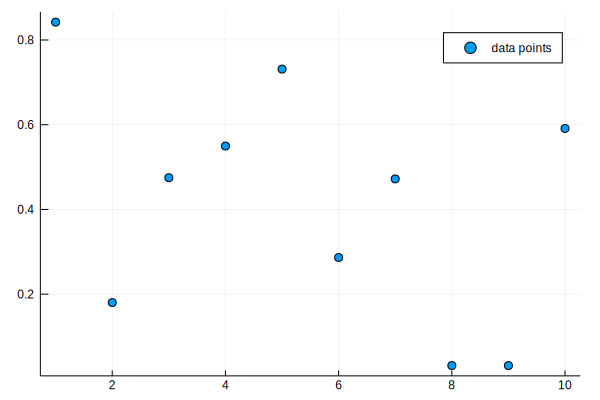

In [5]:
using Plots
xs =  1:1:10
A = [rand() for x in xs]
scatter(xs,A, label="data points")

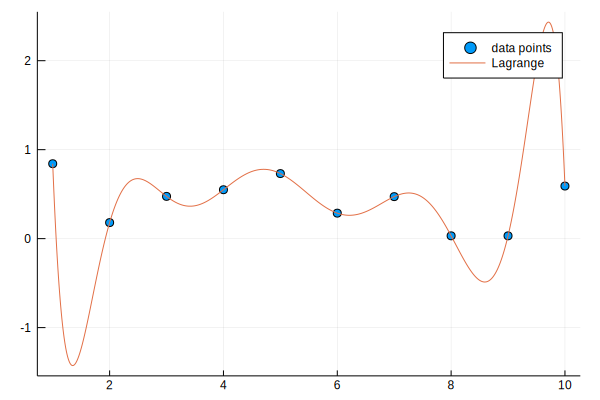

In [6]:
xsf=1:0.01:10
B=[LagrangeInterpolant(xs, A, x) for x in xsf]
plot!(xsf,B, label="Lagrange")

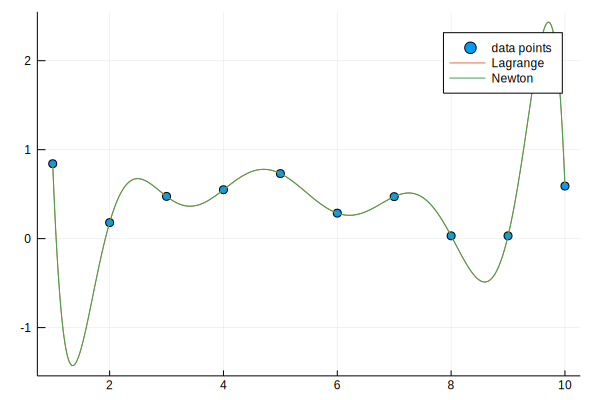

In [7]:
C=[NewtonDividedDifference(xs, A, x) for x in xsf]
plot!(xsf,C, label="Newton")

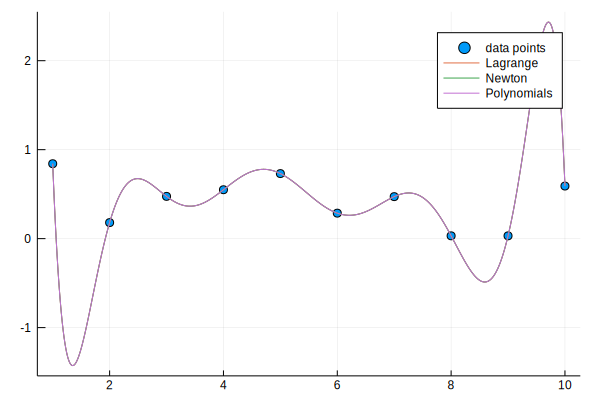

In [8]:
fit1 = polyfit(xs, A)
D=[fit1(x) for x in xsf]
plot!(xsf, D, label="Polynomials")

In [9]:
lagrange_times = Array{Float64}(undef, 200)
newton_times = Array{Float64}(undef, 200)
polynomials_times = Array{Float64}(undef, 200)
size = Array{Int}(undef, 200)
j = 1
for n = 10:1:25
    for i = 1:1:10
        xs = 1:1:n
        A = [rand() for x in xs]
        xsf=1:0.01:n
        lagrange_times[j] = @elapsed [LagrangeInterpolant(xs, A, x) for x in xsf]
        newton_times[j] = @elapsed [NewtonDividedDifference(xs, A, x) for x in xsf]
        polynomials_times[j] = @elapsed fit1 = polyfit(xs, A) 
        polynomials_times[j] += @elapsed[fit1(x) for x in xsf]
        size[j] = n
        j+= 1 
        end
end


In [10]:
using DataFrames 
data_frame = DataFrame()
data_frame[:Col1] = size
data_frame[:Col2] = lagrange_times
data_frame[:Col3] = newton_times
data_frame[:Col4] = polynomials_times
data_frame

,Col1,Col2,Col3,Col4
,Int64,Float64,Float64,Float64
1,10,0.100725,0.0847806,7.23e-5
2,10,0.00239812,0.000627905,9.9001e-5
3,10,0.00210702,0.000622105,7.7701e-5
4,10,0.0113522,0.000407703,5.9001e-5
5,10,0.00145021,0.000425403,5.24e-5
6,10,0.00128081,0.000463504,0.000116101
7,10,0.00139111,0.000678705,6.38e-5
8,10,0.00244542,0.000518404,5.3501e-5
9,10,0.00197122,0.000385503,5.49e-5


In [11]:
using Statistics
avg_times = by(data_frame, :Col1) do df
            DataFrame(m_lagrange = mean(df.Col2), m_newton = mean(df.Col3), m_polynomials = mean(df.Col4),
            v_lagrange = var(df.Col2), v_newton = var(df.Col3), v_polynomials = var(df.Col4))
    end

,Col1,m_lagrange,m_newton,m_polynomials,v_lagrange,v_newton,v_polynomials
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,10,0.0126856,0.00893517,6.92405e-5,0.000965988,0.000710199,5.20698e-10
2,11,0.00233999,0.000534034,6.37106e-5,2.77407e-6,3.02651e-8,2.82018e-10
3,12,0.00262774,0.00108286,7.92006e-5,9.45334e-7,1.21633e-6,4.13219e-10
4,13,0.00283834,0.000733096,6.76905e-5,1.16854e-6,2.4145e-9,3.50813e-11
5,14,0.00401294,0.000903817,8.18308e-5,1.62188e-6,3.11938e-8,2.27257e-10
6,15,0.00435448,0.00145042,9.59808e-5,1.96384e-6,8.47224e-7,4.52466e-10
7,16,0.0074052,0.00164332,9.17109e-5,6.3624e-6,9.19821e-9,1.90839e-10
8,17,0.00981295,0.00188564,0.000103611,9.18285e-6,1.16012e-8,2.48359e-10
9,18,0.0268193,0.018611,0.0148595,0.00135423,0.00120697,0.000946573


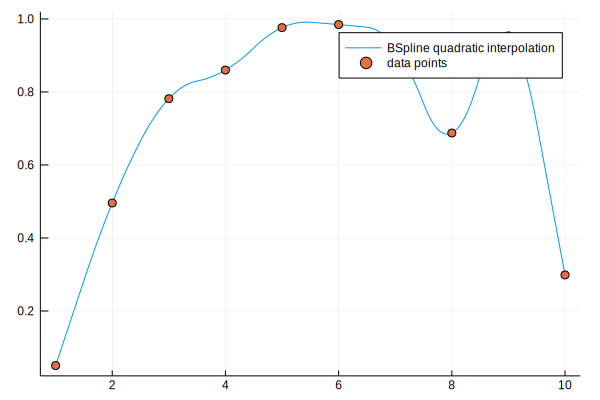

In [12]:

using Interpolations
using Plots
xs =  1:1:10
A = [rand() for x in xs]
xsf=1:0.01:10
itp = interpolate(A, BSpline(Quadratic(Line(OnCell()))))
B=[itp(x) for x in xsf]
plot(xsf,B, label="BSpline quadratic interpolation")
scatter!(xs,A, label="data points")

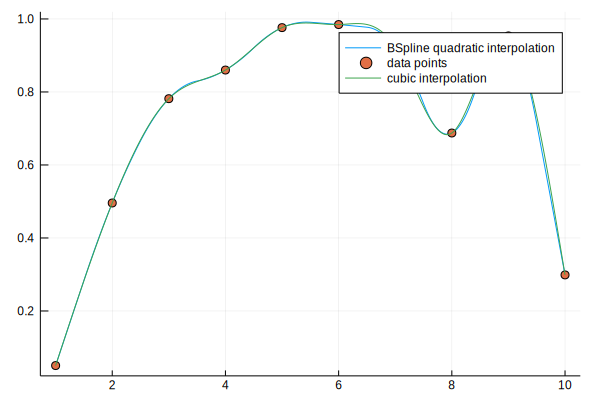

In [13]:
interp_cubic = CubicSplineInterpolation(xs, A)
B2=[interp_cubic(x) for x in xsf]
plot!(xsf,B2, label="cubic interpolation")

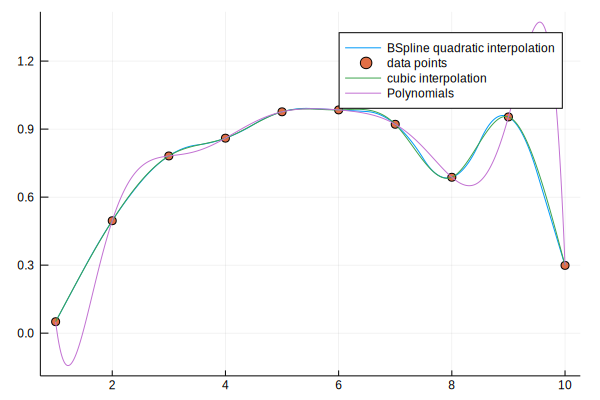

In [14]:

using Polynomials
fit1 = polyfit(xs, A)
D=[fit1(x) for x in xsf]
plot!(xsf, D, label="Polynomials")

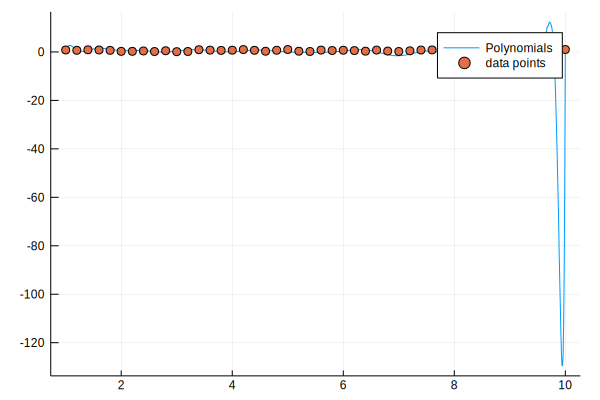

In [15]:
xs =  1:0.2:10
A = [rand() for x in xs]
xsf=1:0.01:10
fit1 = polyfit(xs, A)
D=[fit1(x) for x in xsf]
plot(xsf, D, label="Polynomials")
scatter!(xs,A, label="data points")